
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)



## 7: Studying trends over time in Political Manifestos (1964-2020)


## Text Mining for Historians (with Python)
## A Gentle Introduction to Working with Textual Data in Python

### Created by Kaspar Beelen and Luke Blaxill

### For the German Historical Institute, London

<img align="left" src="https://www.ghil.ac.uk/typo3conf/ext/wacon_ghil/Resources/Public/Images/institute_icon_small.png">






This notebook combines all the insights from previous sessions and explores how Python can be used in more realistic research examples. We focus on studying trends over in time UK Political Manifestos between 1964 and 2020. By creatively putting the stuff together you've seen so far, you can start to meaningfully interrogate thesse corpora.

This notebook will focus on plotting word frequencies, for specific selected (or target) tokens.

First we start with collecting the paths to our manifesto files. These are stores as seperate `.txt` files one for each manifesto. As seen previously, we rely on a library that we need to import first. The `pathlib` library is useful for managing path, files and directories and we'll encounter it more often later in these Notebooks. 

Below we first the folder as a `Path()` object. The we apply `Path.glob()`, with `"*.txt"` as argument. The asterix `*` serves as a wild card, basically what are saying here: in the folder `'data/Manifestos/Processed/'` return as files ending with `.txt` (we don't care what precedes the `.txt` extension).

There is a technically we can ingore for now: we convert the result of `.glob()` to a `list` object. 

In [56]:
from pathlib import Path
folder = Path('data/Manifestos/Processed/')
files = folder.glob('*.txt')
file_paths = list(files)

Now we can count the number of the documents in our corpus by applying the `len()` function to the variable `file_paths`

In [3]:
len(file_paths)

68

And, using index notation, we print the path to the first file in our corpus (not the content itself, this is for later!)

In [57]:
file_paths[0]

PosixPath('data/Manifestos/Processed/51421_201912.txt')

In the previous notebook we've used several tools such as `word_tokenize()` and `Counter()` to count tokens. In this Notebook we want to repeat this procedure for all documents in our collection. We can write a **function** that takes a path as argument and returns a mapping from words to frequencies. 

The code cell below takes care of this, we first import the tools we need and create a function computes word frequencies. To create a function we use the `def` keyword followed by a name, parentheses and and colon. The word between the parenthesis defines the arguments this function accepts.

All the code within this function should look familiar. For each given path the function will execute these steps (note the indentation) and return the variable word_counts.

It is important to run the cell below but only once. Python will then store the function `count_words` in memory and you can reuse it later.

In [62]:
from collections import Counter # import Counter for computing word frequencies
from collections import defaultdict # import defaultdict dict mapping years to frequencies
from nltk.tokenize import word_tokenize # impor the tool for tokenizing strings

def count_words(path): # define the function and the arguments it accepts
    text = open(path,'r').read() # open the document
    text_lowercase = text.lower() # lowercase the text and store in text_lowercase
    tokens = word_tokenize(text_lowercase) # get the tokens as a list
    word_counts = Counter(tokens) # compute word frequencies with Counter()
    return word_counts # return the word frequencies


To check if the function is created just print the `count_words` you see that it is now stored a `function` object.

In [61]:
print(count_words)

<function count_words at 0x125ef4560>


We can apply this function now to the first document by passing `file_paths[0]` as an argument. The second line prints the ten most frequent words.

In [5]:
word_counts = count_words(file_paths[0])
word_counts.most_common(10)

[('the', 1433),
 ('and', 1324),
 ('to', 1127),
 ('.', 1035),
 (',', 1028),
 ('of', 713),
 ('a', 551),
 ('in', 497),
 ('for', 427),
 ('that', 320)]

So now we know how to count words, but the goal is plot word counts over time. If you look close close at the name of the file (i.e. the part after the last `/` you'll notice that it encodes a timestamp.

The filenames are structured as follows `{party identifier}_{year}{month}.{extension}`. Such a setup—where metadata is encoded in the filename—is rather common when working with heritage collections. We can now start writing a function that extracts the time-stamp from the the filename.

First we print the filename.

In [64]:
file_paths[0]

PosixPath('data/Manifestos/Processed/51421_201912.txt')

To make things easier we convert the path (which is now an instance of the class `PosixPath`) to a string. For this we can use `str()`. In Python lingo, such conversion are called type casting. The cell below shows how this works.

In [68]:
path = file_paths[0]
print(type(path))
path = str(file_paths[0])
print(type(path))

<class 'pathlib.PosixPath'>
<class 'str'>


After converting it to a string, we can use split to select the file name (without extension) from the path. Each of the individual steps are examplified below. Note that `.split()` takes different arguments, i.e. we specify what character want to split on, for example splitting by `'/'` breaks up the path in its constituent components.

In [72]:
print(str(file_paths[0]))
print(str(file_paths[0]).split('/'))

data/Manifestos/Processed/51421_201912.txt
['data', 'Manifestos', 'Processed', '51421_201912.txt']


After thus splitting the path (which returns a `list`) we take the last element, the filename. We can do this all in one line to save space and make the code more concise.

In [73]:
str(file_paths[0]).split('/')[-1]

'51421_201912.txt'

The code cell below takes care of all the steps for fishin out the filename from the path:

In [71]:
path = str(file_paths[0])
filename_with_ext = path.split('/')[-1]
filename = filename_with_ext.split('.')[0]
print(filename)

51421_201912


Now only need to get the date informantion. Again we slice the string and convert it an integer. 

In [77]:
filename[-6:-2]

'2019'

In [78]:
int(filename[-6:-2])

2019

Slightly changing the indices we can capture both year and month.

In [83]:
year = int(filename[-6:-2])
month = int(filename[-2:])
print(year, month)

2019 12


In the very last step we use a library `datetime` to convert these numbers (year and month are just integer variable now) to a proper timestamp. Since we don't have access to the exact day we just use the first day of the month.

In [86]:
import datetime
time_stamp = datetime.datetime(year,month,1)
time_stamp

datetime.datetime(2019, 12, 1, 0, 0)

That were many steps! Since we like to repear it for each file, it is again useful to package them in one function.

In [94]:
def path2timestamp(path):
    path = str(path)
    filename_with_ext = path.split('/')[-1]
    filename = filename_with_ext.split('.')[0]
    year = int(filename[-6:-2])
    month = int(filename[-2:])
    time_stamp = datetime.datetime(year,month,1)
    return time_stamp

Now we are ready to explore our corpus! Below, we will iterate over our files and apply both function, storing the results in a dictionary to map time-stamps to word counts.


In [89]:
for p in file_paths[:10]:
    print(p.name)

51421_201912.txt
51340_201505.txt
51902_200106.txt
51620_197410.txt
51621_201505.txt
51903_201706.txt
51420_198706.txt
51210_201706.txt
51320_198706.txt
51210_201505.txt


Again, you are free to choose as long as you do it consistently!

In [90]:
for fp in file_paths[:10]:
    print(fp.name)

51421_201912.txt
51340_201505.txt
51902_200106.txt
51620_197410.txt
51621_201505.txt
51903_201706.txt
51420_198706.txt
51210_201706.txt
51320_198706.txt
51210_201505.txt


The `for` loop below raises a `NameError` as we did not define `pp`.

In [91]:
for fp in file_paths[:10]:
    print(pp)

NameError: name 'pp' is not defined

The last novel element in the code below (which you'll encounter often) is incremental counting. To see how this works, first create a new variable with name `i` with the value zero.

In [19]:
i = 0

Each time we run the cell below, we add `1` to `i` using the `+=` operation. Run the cell muliple time until you understand how this works!


Note difference between `=` and `+=`, former is used to declare variable, the latter to incementally add elements to `i`.

In [99]:
i+=1
print(i)

3


In [102]:
year2counts = {1950:1,1951:10}

In [106]:
year2counts[1950]+=1
year2counts

{1950: 4, 1951: 10}

In [109]:
year2counts[1951]+=5
year2counts[1951]

25

In [105]:
target_term = 'people'
results = defaultdict(int)

for fp in file_paths:
    time_stamp = path2timestamp(fp)
    word_counts = count_words(fp)
    count_for_target = word_counts[target_term]
    results[time_stamp]+= count_for_target

In [111]:
results

defaultdict(int,
            {datetime.datetime(2019, 12, 1, 0, 0): 849,
             datetime.datetime(2015, 5, 1, 0, 0): 1101,
             datetime.datetime(2001, 6, 1, 0, 0): 393,
             datetime.datetime(1974, 10, 1, 0, 0): 156,
             datetime.datetime(2017, 6, 1, 0, 0): 630,
             datetime.datetime(1987, 6, 1, 0, 0): 359,
             datetime.datetime(1992, 4, 1, 0, 0): 250,
             datetime.datetime(1970, 6, 1, 0, 0): 79,
             datetime.datetime(1974, 2, 1, 0, 0): 87,
             datetime.datetime(1983, 6, 1, 0, 0): 193,
             datetime.datetime(2005, 5, 1, 0, 0): 270,
             datetime.datetime(1997, 5, 1, 0, 0): 284,
             datetime.datetime(1966, 3, 1, 0, 0): 32,
             datetime.datetime(1979, 5, 1, 0, 0): 77,
             datetime.datetime(1964, 10, 1, 0, 0): 11})

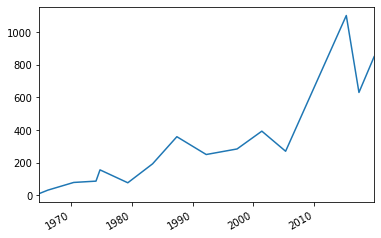

In [110]:
%matplotlib inline
pd.Series(results).plot()

## Putting everything together

## Extensions

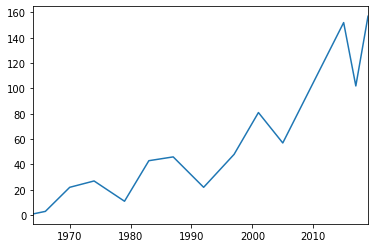

In [34]:
target_terms = ['poverty','poor']
results = defaultdict(int)

for fp in file_paths:
    year = path2year(fp)
    word_counts = count_words(fp)
    for target_term in target_terms:
        count_for_target = word_counts[target_term]
        results[year]+= count_for_target

years_sorted = sorted(results)
pd.Series(results,index=years_sorted).plot()

In [37]:
def count_words2(path):
    text = open(path,'r').read()
    text_lowercase = text.lower()
    tokens = word_tokenize(text_lowercase)
    word_counts = Counter(tokens)
    return word_counts,len(tokens)

In [48]:
target_terms = ['austerity','cuts']
word_counts = defaultdict(int)
total_counts = defaultdict(int)


for fp in file_paths:
    year = path2year(fp)
    word_count,total_count = count_words2(fp)
    for target_term in target_terms:
        count_for_target = word_count[target_term]
        word_counts[year]+= count_for_target
        total_counts[year]+= total_count


In [49]:
results = {}
for key in word_counts:
    results[key] = word_counts[key] / total_counts[key]

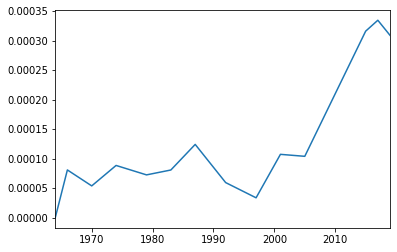

In [50]:
years_sorted = sorted(results)
pd.Series(results,index=years_sorted).plot()